In [138]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

In [139]:
ticker = 'AAPL'
data = yf.download(ticker, start = '2015-07-01', end = '2025-07-01')['Close']
data

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015-07-01,28.354202
2015-07-02,28.318365
2015-07-06,28.219820
2015-07-07,28.150389
2015-07-08,27.451612
...,...
2025-06-24,200.300003
2025-06-25,201.559998
2025-06-26,201.000000


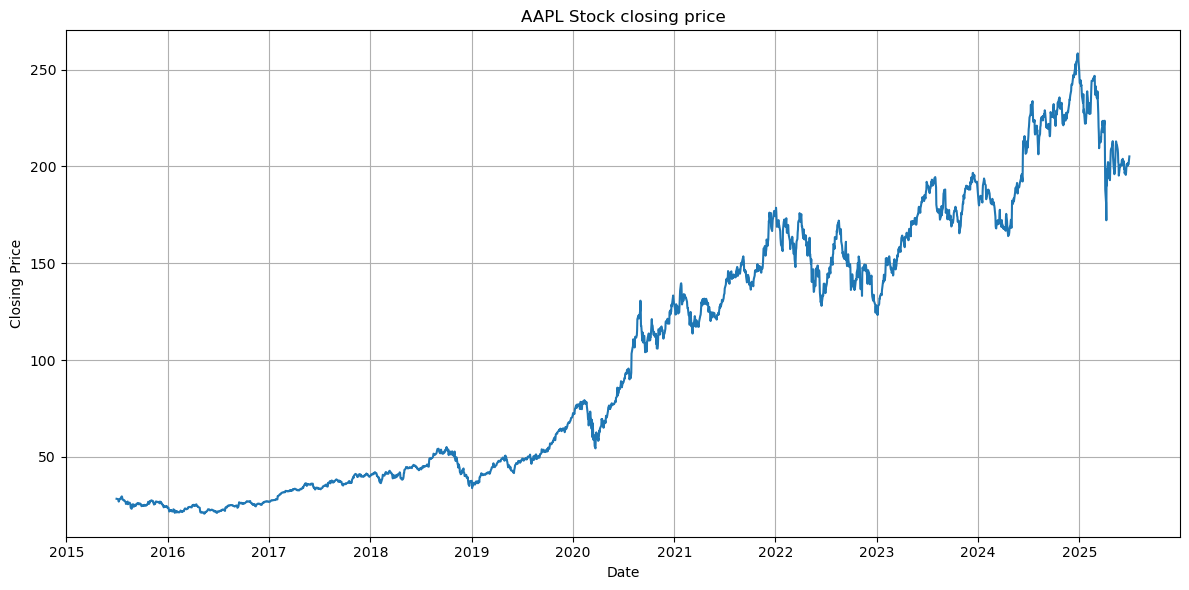

In [140]:
plt.figure(figsize = (12,6))
plt.plot(data.index, data[ticker], label = ticker)
plt.title('AAPL Stock closing price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

## Arch Model

In [141]:
df = yf.download(ticker, start = '2022-07-01', end = '2025-07-01')

[*********************100%***********************]  1 of 1 completed


In [142]:
# Daily returns
df['returns'] = df['Close'].pct_change()*100
returns = df['returns'].dropna()
returns

Date
2022-07-05    1.893027
2022-07-06    0.960739
2022-07-07    2.399921
2022-07-08    0.471474
2022-07-11   -1.475793
                ...   
2025-06-24   -0.595532
2025-06-25    0.629054
2025-06-26   -0.277832
2025-06-27    0.039802
2025-06-30    2.034014
Name: returns, Length: 750, dtype: float64

In [143]:
# Training the model
model = arch_model(returns, vol = 'ARCH', p = 1)
results_arch = model.fit(disp = 'on')
conditional_vol_arch = results_arch.conditional_volatility

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3117.8654965979426
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1475.0306304135343
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1443.1398513083602
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1442.7980707389156
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1442.7980707389163


In [144]:
results_arch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1442.80
Distribution:                  Normal   AIC:                           2891.60
Method:            Maximum Likelihood   BIC:                           2905.46
                                        No. Observations:                  750
Date:                Wed, Aug 06 2025   Df Residuals:                      749
Time:                        17:26:54   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1134  6.124e-02      1.852  6.397e-02 [-6.589e-03,  0.233]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.0585      0.255      8.088  6.052e-16 [  1.560,  2.557]
alpha[1]       0.3546      0.118      3.009  2.619e-03 [  0.124,  0.586]
========================================================================

Covariance estimator: robust
"""

In [145]:
# Forecasting 5 days

forecast = results_arch.forecast(horizon = 5)
predicted_variance = forecast.variance
predicted_vol = predicted_variance ** 0.5
predicted_vol

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2025-06-30,1.83483,1.803441,1.792177,1.788166,1.786741


In [146]:
# Mean of predicted volatility

predicted_vol = [2.10615, 1.895612, 1.814787, 1.785135, 1.774461]
predicted_avg_vol = sum(predicted_vol)/len(predicted_vol)
predicted_avg_vol

1.8752289999999998

In [147]:
# Calculating realized volatility

last_date = pd.to_datetime('2024-12-31')

start_date = pd.to_datetime('2024-12-31')
end_date = pd.to_datetime('2025-07-01')

real_df = yf.download('AAPL', start_date, end_date)
real_df['returns'] = real_df['Close'].pct_change() * 100
real_df = real_df.dropna()
real_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2025-01-02,243.263199,248.500565,241.238085,248.330961,55740700,-2.623584
2025-01-03,242.774368,243.592387,241.307905,242.774368,40244100,-0.200947
2025-01-06,244.410416,246.734810,242.614744,243.722074,45045600,0.673896
2025-01-07,241.627136,244.959095,240.769205,242.395272,40856000,-1.138773
2025-01-08,242.115952,243.123531,239.472335,241.337830,37628900,0.202301
...,...,...,...,...,...,...
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000,-0.595532
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700,0.629054


In [149]:
# Realized volatility

realized_vol = real_df['returns'].std() * np.sqrt(5)
realized_vol = returns.rolling(window=5).std()
realized_vol.dropna()
realized_vol


Date
2022-07-05         NaN
2022-07-06         NaN
2022-07-07         NaN
2022-07-08         NaN
2022-07-11    1.504578
                ...   
2025-06-24    1.366876
2025-06-25    1.035031
2025-06-26    1.110163
2025-06-27    0.471866
2025-06-30    1.036453
Name: returns, Length: 750, dtype: float64

In [150]:
print(f"ARCH Model Predicted Volatility: {predicted_avg_vol:8.4f}")
print(f"ARCH Model Actual Volatility: {realized_vol.mean():8.4f}")

ARCH Model Predicted Volatility:   1.8752
ARCH Model Actual Volatility:   1.4922


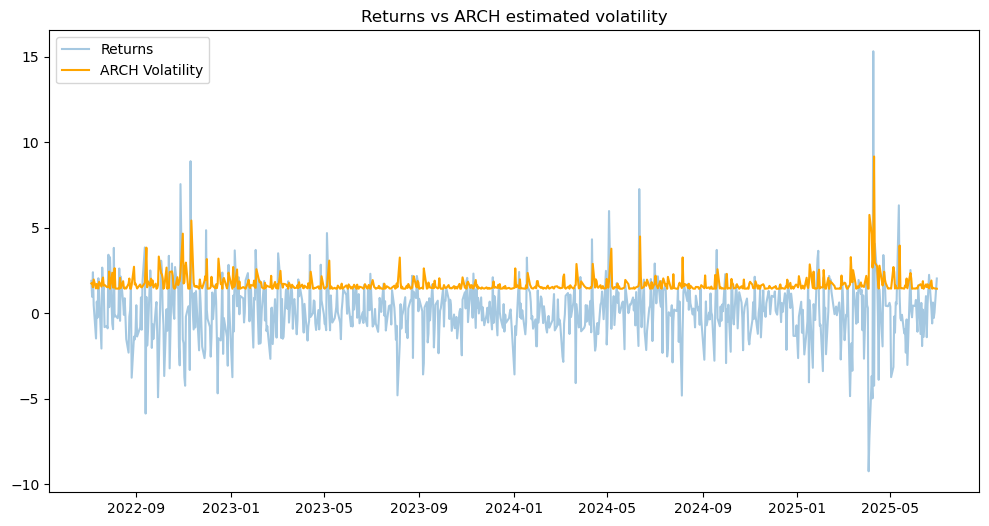

In [151]:
plt.figure(figsize = (12,6))
plt.plot(returns.index, returns, label = 'Returns', alpha=0.4)
plt.plot(returns.index, conditional_vol_arch, color = 'orange', label = 'ARCH Volatility')
plt.title('Returns vs ARCH estimated volatility')
plt.legend()
plt.show()

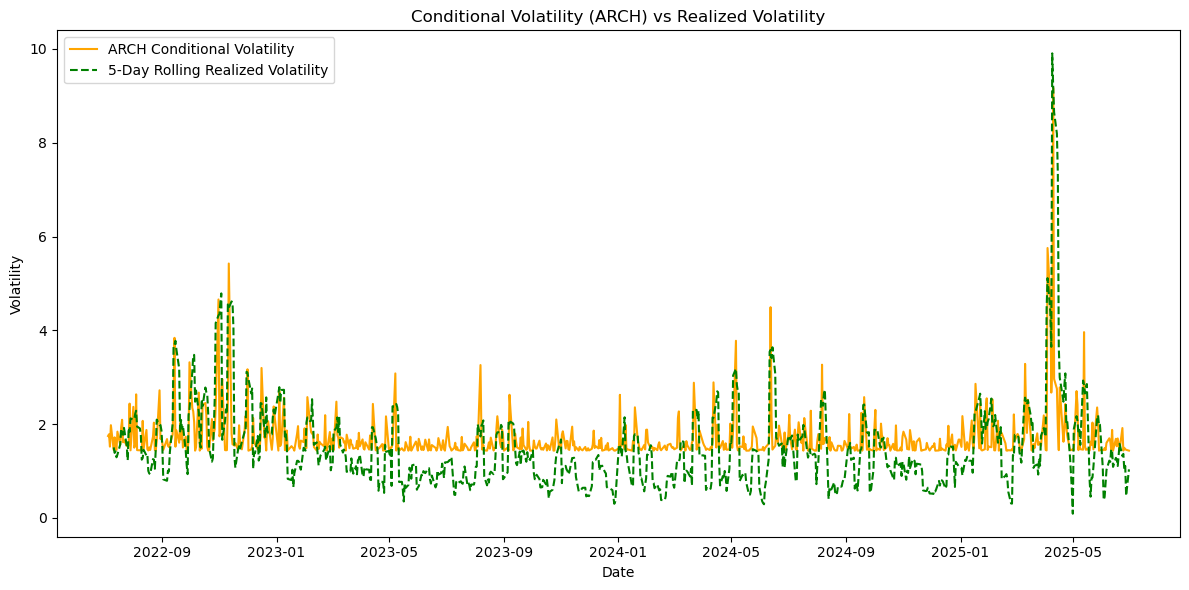

In [152]:
plt.figure(figsize=(12,6))

plt.plot(returns.index, conditional_vol_arch, color='orange', label='ARCH Conditional Volatility')
plt.plot(returns.index, realized_vol, color='green', label='5-Day Rolling Realized Volatility', linestyle='--')

plt.title('Conditional Volatility (ARCH) vs Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

## GARCH Volatility

In [153]:
df = yf.download(ticker, start = '2022-07-01', end = '2025-07-01')

[*********************100%***********************]  1 of 1 completed


In [154]:
# Daily returns
df['returns'] = df['Close'].pct_change()*100
returns = df['returns'].dropna()
returns

Date
2022-07-05    1.893027
2022-07-06    0.960739
2022-07-07    2.399921
2022-07-08    0.471474
2022-07-11   -1.475793
                ...   
2025-06-24   -0.595532
2025-06-25    0.629054
2025-06-26   -0.277832
2025-06-27    0.039802
2025-06-30    2.034014
Name: returns, Length: 750, dtype: float64

In [166]:
model = arch_model(returns, vol = 'GARCH', p = 1, q = 1)
results_garch = model.fit(disp = 'on')
conditional_vol_garch = results_garch.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 451.1936062381281
Iteration:      2,   Func. Count:     13,   Neg. LLF: 304.59887142300994
Iteration:      3,   Func. Count:     19,   Neg. LLF: 300.9757598210619
Iteration:      4,   Func. Count:     25,   Neg. LLF: 277.5054166597894
Iteration:      5,   Func. Count:     32,   Neg. LLF: 272.4534113257846
Iteration:      6,   Func. Count:     37,   Neg. LLF: 272.4406044218148
Iteration:      7,   Func. Count:     42,   Neg. LLF: 272.44007057570633
Iteration:      8,   Func. Count:     47,   Neg. LLF: 272.440051565692
Iteration:      9,   Func. Count:     52,   Neg. LLF: 272.44004901504945
Iteration:     10,   Func. Count:     56,   Neg. LLF: 272.44004901523425


In [167]:
results_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -272.440
Distribution:                  Normal   AIC:                           552.880
Method:            Maximum Likelihood   BIC:                           564.096
                                        No. Observations:                  122
Date:                Wed, Aug 06 2025   Df Residuals:                      121
Time:                        17:28:17   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1156      0.205     -0.563      0.574 [ -0.518,  0.287]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1477      0.503      2.282  2.249e-02    [  0.162,  2.134]
alpha[1]       0.1901      0.100      1.892  5.855e-02 [-6.873e-03,  0.387]
beta[1]        0.6178  8.573e-02      7.207  5.733e-13    [  0.450,  0.786]
===========================================================================

Covariance estimator: robust
"""

In [168]:
# Forecasting 5 days

forecast = results_garch.forecast(horizon = 5)
predicted_variance = forecast.variance
predicted_vol_garch = predicted_variance ** 0.5
predicted_vol_garch

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2025-06-30,1.999189,2.092099,2.164253,2.220839,2.265524


In [169]:
# mean of predicted volatility

predicted_vol_garch = [1.445998, 1.457142, 1.467833, 1.478092, 1.487942]
predicted_avg_vol_garch = sum(predicted_vol_garch)/len(predicted_vol_garch)
predicted_avg_vol_garch

1.4674014

In [170]:
# Calculating realized volatility

start_date = pd.to_datetime('2024-12-31')
end_date = pd.to_datetime('2025-07-01')

real_df = yf.download(ticker, start = start_date, end = end_date)
real_df['returns'] = real_df['Close'].pct_change() * 100
returns = real_df['returns'].dropna()

[*********************100%***********************]  1 of 1 completed


In [171]:
realized_vol_garch = real_df['returns'].std() * np.sqrt(5)
realized_vol_garch = returns.rolling(window = 5).std()
realized_vol_garch.dropna()
realized_vol_garch

Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08    1.304741
                ...   
2025-06-24    1.366876
2025-06-25    1.035031
2025-06-26    1.110163
2025-06-27    0.471866
2025-06-30    1.036453
Name: returns, Length: 122, dtype: float64

In [172]:
print(f"GARCH model predicted volatility: {predicted_avg_vol_garch:8.4f}")
print(f"GARCH model realized volatility: {realized_vol.mean():8.4f}")

GARCH model predicted volatility:   1.4674
GARCH model realized volatility:   1.4922


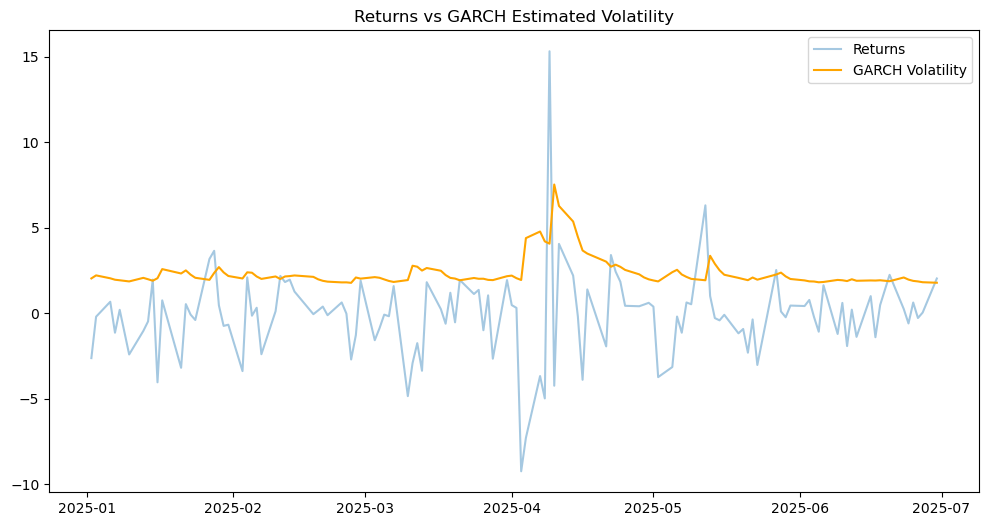

In [173]:
plt.figure(figsize = (12,6))
plt.plot(returns.index, returns, label = 'Returns', alpha = 0.4)
plt.plot(returns.index, conditional_vol_garch, color = 'orange', label = 'GARCH Volatility')
plt.title('Returns vs GARCH Estimated Volatility')
plt.legend()
plt.show()

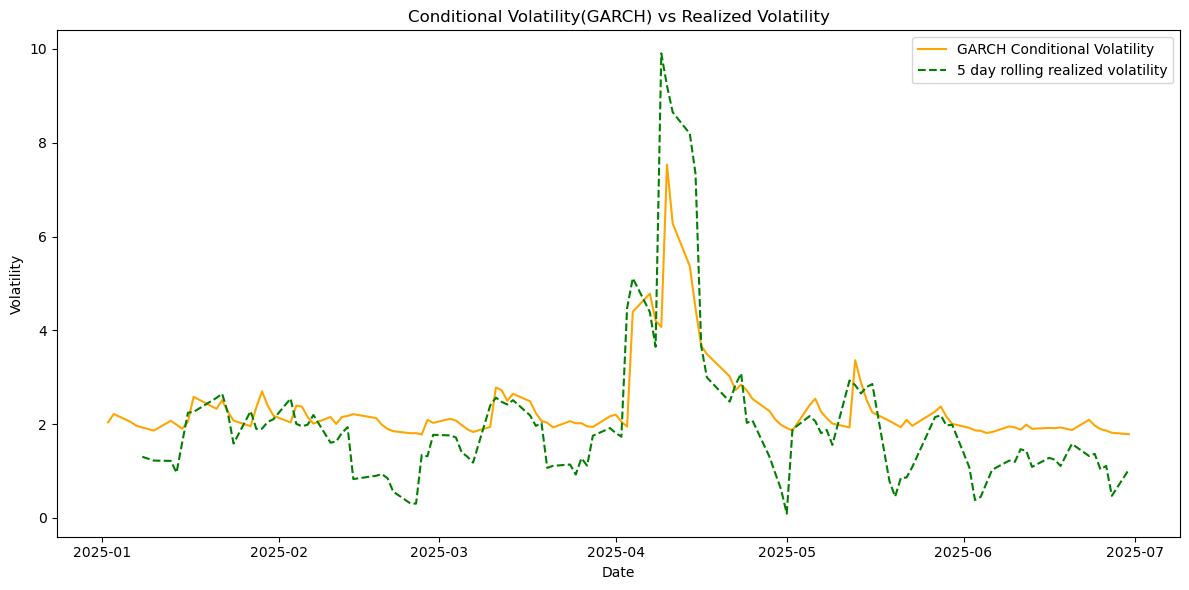

In [174]:
plt.figure(figsize = (12,6))
plt.plot(returns.index, conditional_vol_garch, color = 'orange', label = 'GARCH Conditional Volatility')
plt.plot(returns.index, realized_vol_garch, color = 'green', label = '5 day rolling realized volatility', linestyle = '--')
plt.title('Conditional Volatility(GARCH) vs Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()